In [69]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
from emnist import extract_test_samples
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import os

## Table of content

- Load MNIST trained model (Base model)
- Evaluate on MNIST
- Clone base model (new model)
- Upload EMNIST 36 data
- Evaluate first without transfer learning
- fine-tune new model on EMNSIT small data
- Evaluate again 
- Compare performance with a model trained from scratch on the same EMNIST small data

- **Load MNIST trained model**

In [70]:
#Reading the model from JSON file
with open('saved_model/MNIST_trained.json', 'r') as json_file:
    json_savedModel= json_file.read()
#load the model architecture 
model = tf.keras.models.model_from_json(json_savedModel)
print("\n\n*********************MNIST model*********************\n\n")
model.summary()
# Load weights
model.load_weights('saved_model/MNIST_trained_weights.h5')

model.pop()     # Removing output layer
# Add a new dense hidden layer with 10 neurons for EMNIST
model.add(layers.Dense(50, activation='relu', name='emnist_dense_layer'))
model.add(layers.Dense(15, activation = 'softmax', name = 'emnist_output_layer'))
print("\n\n*********************Updated TL model*********************\n\n")
model.summary()
# Freezing MNIST dense layer with trained weights
for layer in model.layers:
    if layer.name == 'MNIST_dense_layer':
        layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



*********************MNIST model*********************


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 MNIST_dense_layer (Dense)   (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


*********************Updated TL model*********************


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 7

- **Evaluate first on MNIST dataset**

In [71]:
# # Load and preprocess the MNIST dataset
# (MNIST_train, MNIST_train_labels), (MNIST_test, MNIST_test_labels) = mnist.load_data()
# # One-hot encode the labels
# MNIST_train_labels = to_categorical(MNIST_train_labels)
# MNIST_test_labels = to_categorical(MNIST_test_labels)

In [72]:
# # Compile the model
# base_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [73]:
# # Evaluate the model on the test set
# mnist_loss, mnist_acc = base_model.evaluate(MNIST_test, MNIST_test_labels, verbose=0)
# print(f'MNIST accuracy: {round(mnist_acc*100,2)} %')

- **Cloning Base model**

In [74]:
# # Clone the model (including architecture and weights)
# new_model = tf.keras.models.clone_model(base_model)
# new_model.set_weights(base_model.get_weights())
# new_model.pop()     # Removing output layer
# new_model.add(layers.Dense(36, activation = 'softmax', name = 'emnist_output_layer'))
# new_model.summary()

- **Uploading formatted emnist 15 classes data**


In [75]:
emnist_train = np.load('data/emnist15_train.npy')
emnist_train_labels = np.load('data/emnist15_train_labels.npy')
emnist_test = np.load('data/emnist15_test.npy')
emnist_test_labels = np.load('data/emnist15_test_labels.npy')
# One-hot encode the labels
emnist_train_labels = to_categorical(emnist_train_labels)
emnist_test_labels = to_categorical(emnist_test_labels)

- **Evaluating model performance without transfer learning**

In [76]:
# # Compile the model
# new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# # Evaluate the model on the test set
# emnist_loss, emnist_acc = new_model.evaluate(emnist_test, emnist_test_labels, verbose=0)
# print(f'EMNIST accuracy: {round(emnist_acc*100,2)} %')

- **Train the model with a batch of EMNIST 15 data**

In [77]:
batch_size = 5000  # Amount of data to select
# Set the seed for reproducibility
np.random.seed(128)

# Randomly shuffle the indices
indices = np.random.permutation(len(emnist_train))

selected_indices = indices[:batch_size]

# Extract images and labels based on selected indices
emnist_train_batch = emnist_train[selected_indices]
emnist_train__labels_batch = emnist_train_labels[selected_indices]

"""
~ Additional step: Reduce the batch size but make sure that all samples are included atleast ~N times
"""

'\n~ Additional step: Reduce the batch size but make sure that all samples are included atleast ~N times\n'

In [78]:
# optimizer = Adam(learning_rate=1e-4)
model.fit(emnist_train_batch, emnist_train__labels_batch, batch_size=32,epochs=5, validation_split=0.2)

Epoch 1/5


125/125 [==============================] - 1s 3ms/step - loss: 13.2487 - accuracy: 0.2795 - val_loss: 5.5705 - val_accuracy: 0.4070
Epoch 2/5
125/125 [==============================] - 0s 2ms/step - loss: 4.1604 - accuracy: 0.4642 - val_loss: 3.9345 - val_accuracy: 0.4740
Epoch 3/5
125/125 [==============================] - 0s 2ms/step - loss: 2.9477 - accuracy: 0.5115 - val_loss: 3.2414 - val_accuracy: 0.4800
Epoch 4/5
125/125 [==============================] - 0s 2ms/step - loss: 2.3231 - accuracy: 0.5397 - val_loss: 2.8854 - val_accuracy: 0.5080
Epoch 5/5
125/125 [==============================] - 0s 2ms/step - loss: 1.9985 - accuracy: 0.5617 - val_loss: 2.6830 - val_accuracy: 0.5280


- **Fine-tune the entire model to improve model performance (Additional step)**

In [79]:
# Unfreezing MNIST dense layer with trained weights
for layer in model.layers:
    if layer.name == 'MNIST_dense_layer':
        layer.trainable = True

# Compile the model
optimizer = Adam(learning_rate=1e-4) # low learning rate
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(emnist_train_batch, emnist_train__labels_batch, batch_size=32,epochs=10, validation_split=0.2)

Epoch 1/10


125/125 [==============================] - 1s 4ms/step - loss: 1.6551 - accuracy: 0.6003 - val_loss: 2.3109 - val_accuracy: 0.5440
Epoch 2/10
125/125 [==============================] - 0s 3ms/step - loss: 1.4267 - accuracy: 0.6283 - val_loss: 2.1833 - val_accuracy: 0.5780
Epoch 3/10
125/125 [==============================] - 0s 3ms/step - loss: 1.2940 - accuracy: 0.6507 - val_loss: 2.0977 - val_accuracy: 0.5700
Epoch 4/10
125/125 [==============================] - 0s 3ms/step - loss: 1.1876 - accuracy: 0.6693 - val_loss: 2.0282 - val_accuracy: 0.5730
Epoch 5/10
125/125 [==============================] - 0s 3ms/step - loss: 1.1168 - accuracy: 0.6862 - val_loss: 1.9924 - val_accuracy: 0.5770
Epoch 6/10
125/125 [==============================] - 0s 3ms/step - loss: 1.0449 - accuracy: 0.6988 - val_loss: 1.9678 - val_accuracy: 0.5850
Epoch 7/10
125/125 [==============================] - 0s 3ms/step - loss: 0.9838 - accuracy: 0.7013 - val_loss: 1.9415 - val_accuracy: 0.5960
Epoch 8/10
125/12

In [80]:
# Evaluate the model on the test set
emnist_loss, emnist_acc = model.evaluate(emnist_test, emnist_test_labels)
print(f'EMNIST accuracy: {round(emnist_acc*100,2)} %')

  1/188 [..............................] - ETA: 5s - loss: 2.1273 - accuracy: 0.6562

188/188 [==============================] - 0s 1ms/step - loss: 1.8461 - accuracy: 0.6407
EMNIST accuracy: 64.07 %


In [81]:
test_label_predict = model.predict(emnist_test)
test_label_predict = tf.argmax(test_label_predict, axis=1).numpy()

 41/188 [=====>........................] - ETA: 0s 

188/188 [==============================] - 0s 1ms/step


- **Visualizing results, mapping labels for visualization clarity**

In [82]:
"""
Working on mapping
"""
# Assuming emnist_labels is the array of original labels
# emnist_labels = np.array([0, 1, 2, ..., 45, 46])

# Define a mapping for digits and alphabets
digit_mapping = {i: str(i) for i in range(10)}
alphabet_mapping = {i: chr(i + 55) for i in range(10,36)}  # ASCII code for 'A' is 65, so we use 55 to map to 11

# Apply the mapping to the labels
mapped_labels = np.array([digit_mapping[label] if label < 10 else alphabet_mapping[label] for label in test_label_predict])


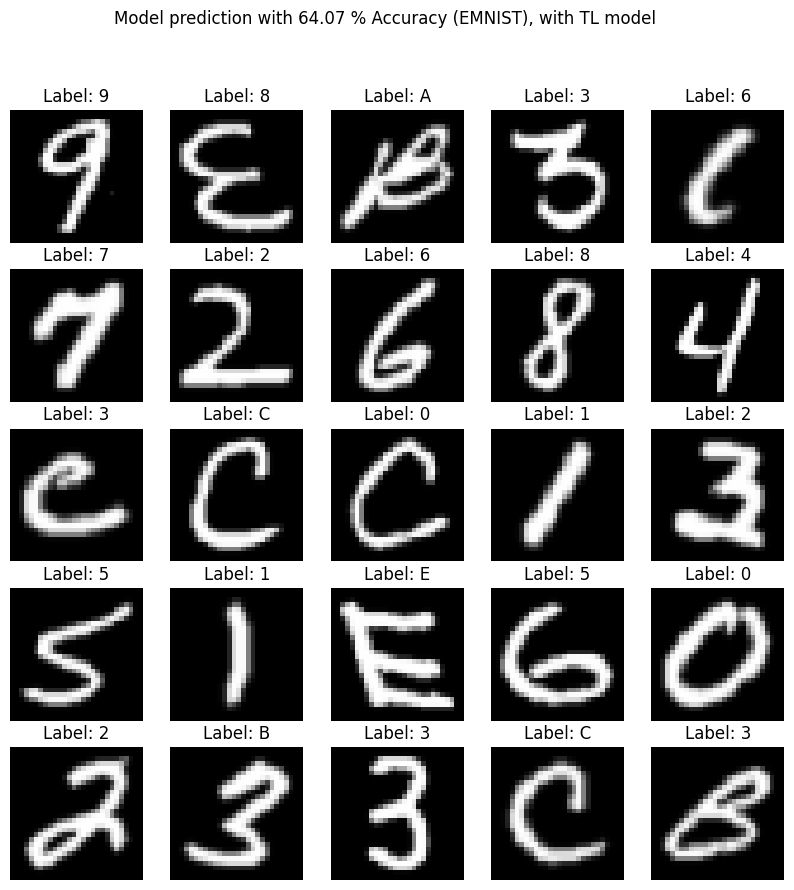

In [83]:
# Display some random images from the training set
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(emnist_test[i], cmap='gray')
    plt.title(f"Label: {mapped_labels[i]}") 
    plt.axis('off')
    plt.suptitle('Model prediction with {} % Accuracy (EMNIST), with TL model'.format(round((emnist_acc*100),2)))
plt.show()